# loading data 

In [1]:
import tensorflow as tf


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

### showing some example of the training data

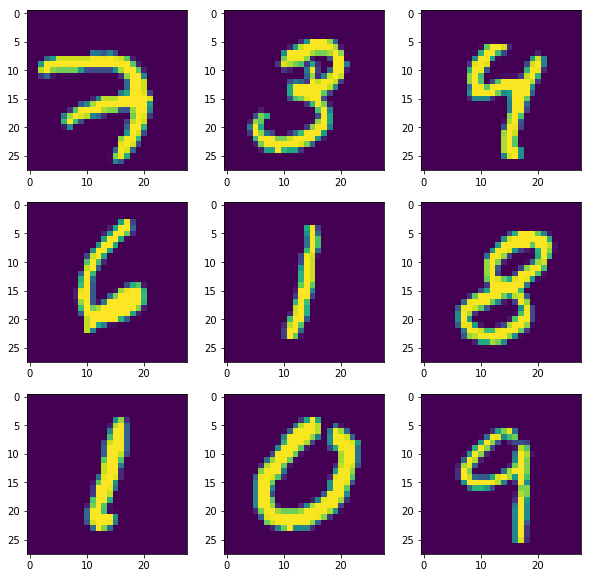

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
i=0
for r in range(3):
    for c in range(3):
        axs[r,c].imshow(mnist.train.images[i].reshape([28,28]))
        i+=1


### the next batch function is desiened to iterate through data 
### every time you run the cell below another number will show up !!
### it takes the batch size as an argument 

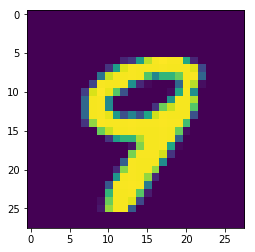

In [8]:
import time 
x=mnist.train.next_batch(5)
plt.imshow(x[0][1].reshape([28,28]))

# creating the model 

In [6]:
#placeholders
images =tf.placeholder(dtype=tf.float32,shape=[None,784])#shape <-- batch size , number of features (pisels in image)
corresponding_n=tf.placeholder(dtype=tf.float32,shape=[None,10])#shape <-- batch size , labels

In [7]:
         #variables
    #weights
w=tf.Variable(tf.zeros([784,10]))
    #biases
b=tf.Variable(tf.zeros([10]))

In [8]:
#graph operation(model)
learned_n=tf.add(tf.matmul( images,w),b)

$$cross entropy=-\sum_{i=0}^\infty L \log{S} $$
#####  where 
######          L is the lables (hot incoded array of 10) 
######          S is the segmoid function output  (probabilty array of 10) 
https://en.wikipedia.org/wiki/Cross_entropy

In [9]:
#loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=corresponding_n,logits=learned_n))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [10]:
# optimizer
optmizer=tf.train.AdamOptimizer()
train=optmizer.minimize(cross_entropy)
saver = tf.train.Saver()

In [ ]:
#session
from tqdm import tqdm
init=tf.global_variables_initializer()
from training_bar import learning_progress_bar
with tf.Session() as sess:
    sess.run(init)
    batch_size=(100)
    steps=1000
    for i in  tqdm(range(steps)):
        data,n=mnist.train.next_batch(batch_size=batch_size,shuffle=True)
        sess.run(train,feed_dict={images:data,corresponding_n:n})# feed dict --> {plceholder: batch}
        learning_progress_bar(steps,i)
        tf.summary.FileWriter('Mnist_using_linear_regressor_model/g',sess.graph)
        saver.save(sess,'Mnist_using_linear_regressor_model/first_model.ckpt')
        
    

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

## restoring the model and begining the second training session

In [42]:
saver = tf.train.Saver()
from tqdm import tqdm
with tf.Session() as sess:
    saver.restore(sess,'Mnist_using_linear_regressor_model/first_model.ckpt')
    
    batch_size=(100)
    steps=10000
    for i in  tqdm(range(steps)):
        data,n=mnist.train.next_batch(batch_size=batch_size,shuffle=True)
        sess.run(train,feed_dict={images:data,corresponding_n:n})# feed dict --> {plceholder: batch}
        saver.save(sess,'Mnist_using_linear_regressor_model/first_model.ckpt')
    #predictions =sess.run(corresponding_n)
    # Test the Train Model
    matches = tf.equal(tf.argmax(learned_n,1),tf.argmax(corresponding_n,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print("model accuracy is : ",sess.run(acc,feed_dict={images:mnist.test.images,corresponding_n:mnist.test.labels}))


INFO:tensorflow:Restoring parameters from Mnist_using_linear_regressor_model/first_model.ckpt


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [13:17<00:00, 13.53it/s]


model accuracy is :  0.9263
[7 2 1]


In [44]:
with tf.Session() as sess:
    saver.restore(sess,'Mnist_using_linear_regressor_model/first_model.ckpt')
    output = tf.argmax(learned_n,1)
    predicted=sess.run(output,feed_dict={images:mnist.test.images[0:10]})
    print(predicted)
    

INFO:tensorflow:Restoring parameters from Mnist_using_linear_regressor_model/first_model.ckpt
[7 2 1 0 4 1 4 9 6 9]


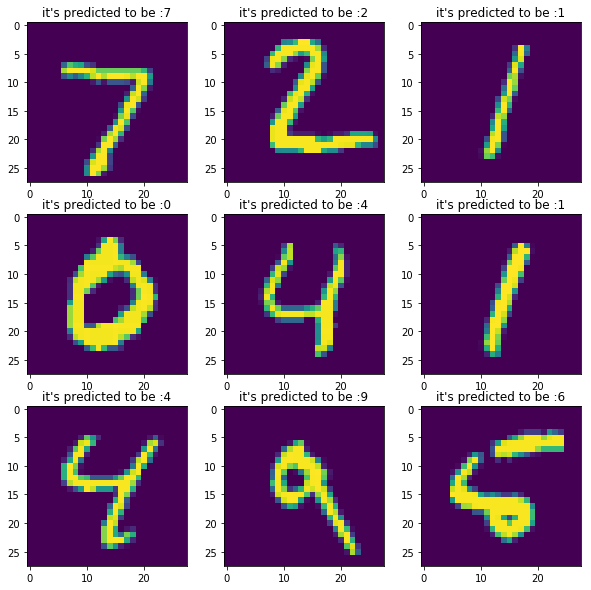

In [74]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
#plt.imshow(mnist.test.images[i].reshape([28,28]))
i=0
for r in range(3):
    for c in range(3):
        plt.subplot(3,3,i+1).set_title("it's predicted to be :"+str(predicted[i]))
        plt.subplot(3,3,i+1).imshow(mnist.test.images[i].reshape([28,28]))

        

        i+=1
